# 铺垫
来自示例6-26、6-31

In [1]:
from PIL import Image
import io
from urllib import request
import matplotlib.pyplot as plt
import numpy as np
url = 'https://raw.githubusercontent.com/MachineIntellect/DeepLearner/master/J.png'
resp = request.urlopen(url)
s = resp.read()
imgG = Image.open(io.BytesIO(s)).convert('L')
img_data = np.asarray(imgG)
filter3 = np.array([[1,1,1],
          [0,0,0],
          [-1,-1,-1]])
def conv2D(x,kernel):
    (n_H_prev, n_W_prev) = x.shape
    (f, f) = kernel.shape
    n_H = n_H_prev - f + 1
    n_W = n_W_prev - f + 1
    Z = np.zeros((n_H, n_W))
    for h in range(n_H):
        for w in range(n_W):
            vert_start = h
            vert_end = vert_start + f
            horiz_start = w
            horiz_end = horiz_start + f
            a_slice_prev = img_data[vert_start:vert_end, horiz_start:horiz_end]
            mat = np.multiply(a_slice_prev, kernel)
            Z[h, w] = np.sum(mat)
    return Z
Zh = conv2D(img_data, filter3)
Zv = conv2D(img_data, filter3.T)
zhn = abs((Zh - Zh.min())/(Zh.max() - Zh.min()))

# 示例6-32

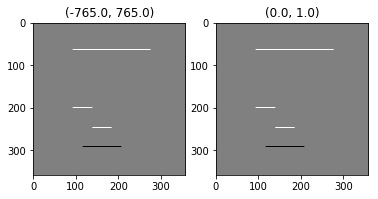

In [2]:
fig, axs = plt.subplots(1, 2)
for a in axs:
    a.grid(False)
a = axs[0].imshow(Zh, cmap='gray')
axs[0].set_title(a.get_clim())
a = axs[1].imshow(zhn, cmap='gray')
axs[1].set_title(a.get_clim())
plt.show()